In [1]:
!pip install neuralprophet

     |████████████████████████████████| 74 kB 4.5 MB/s eta 0:00:011
     |████████████████████████████████| 133.6 MB 1.0 MB/s eta 0:00:01    |███████████▍                    | 47.5 MB 1.1 MB/s eta 0:01:21     |█████████████▎                  | 55.2 MB 1.0 MB/s eta 0:01:16██████████████████            | 83.3 MB 1.0 MB/s eta 0:00:48


In [171]:
#패키지 임포트
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
set_log_level("ERROR")

In [172]:
df = pd.read_csv('timeseriesanaylsis.csv')
df

,예정시간,startpos1,startpos2
0,2018-01-23 00:04:00,성북구,장위제1동
1,2018-01-23 00:17:00,중랑구,면목제7동
2,2018-01-23 00:17:06,성북구,정릉제3동
3,2018-01-23 00:47:00,구로구,고척제2동
4,2018-01-23 01:08:00,동대문구,회기동
...,...,...,...
407548,2022-06-24 07:00:00,성북구,돈암제2동
407549,2022-06-24 07:00:00,은평구,구산동
407550,2022-06-24 07:00:00,노원구,상계8동
407551,2022-06-24 06:55:01,성북구,길음제1동


In [173]:
import pandas as pd

In [174]:
df['예정시간'] = pd.to_datetime(df['예정시간'])

In [175]:
df['예정시간'] = pd.to_datetime(df['예정시간'].dt.strftime('%Y-%m-%d'))

In [176]:
df = df[['예정시간', 'startpos1', 'startpos2']]

In [177]:
df

,예정시간,startpos1,startpos2
0,2018-01-23,성북구,장위제1동
1,2018-01-23,중랑구,면목제7동
2,2018-01-23,성북구,정릉제3동
3,2018-01-23,구로구,고척제2동
4,2018-01-23,동대문구,회기동
...,...,...,...
407548,2022-06-24,성북구,돈암제2동
407549,2022-06-24,은평구,구산동
407550,2022-06-24,노원구,상계8동
407551,2022-06-24,성북구,길음제1동


In [178]:
df[df['startpos1'] == '강서구'].groupby('예정시간').count()['startpos1'].describe()

count    1637.000000
mean       22.926695
std         4.449197
min        10.000000
25%        20.000000
50%        23.000000
75%        26.000000
max        40.000000
Name: startpos1, dtype: float64

In [179]:
df[df['startpos1'] == '강서구'].groupby('예정시간').count()['startpos1'].describe()
df.head()

,예정시간,startpos1,startpos2
0,2018-01-23,성북구,장위제1동
1,2018-01-23,중랑구,면목제7동
2,2018-01-23,성북구,정릉제3동
3,2018-01-23,구로구,고척제2동
4,2018-01-23,동대문구,회기동


In [210]:
data = df.rename(columns = {'예정시간' : 'date'})
data[data['startpos1'] == '강서구'].groupby('date').count().describe()['startpos1']
data

,date,startpos1,startpos2
0,2018-01-23,성북구,장위제1동
1,2018-01-23,중랑구,면목제7동
2,2018-01-23,성북구,정릉제3동
3,2018-01-23,구로구,고척제2동
4,2018-01-23,동대문구,회기동
...,...,...,...
407548,2022-06-24,성북구,돈암제2동
407549,2022-06-24,은평구,구산동
407550,2022-06-24,노원구,상계8동
407551,2022-06-24,성북구,길음제1동


In [182]:
data = data[data['startpos1'] == '강서구'].groupby('date').count()

In [183]:
data = data.reset_index()[['date', 'startpos1']]

In [184]:
data

,date,startpos1
0,2018-01-01,23
1,2018-01-02,24
2,2018-01-03,18
3,2018-01-04,21
4,2018-01-05,23
...,...,...
1632,2022-06-21,27
1633,2022-06-22,22
1634,2022-06-23,26
1635,2022-06-24,17


# 데이터 전처리 및 모델 학습

In [185]:
#train test split
cutoff = "2021-01-01"
train_df = data[data['date']<cutoff]
test_df = data[data['date']>=cutoff]

In [186]:
#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["date"], "y": train_df["startpos1"]})
test = pd.DataFrame({"ds": test_df["date"], "y": test_df["startpos1"]})

In [187]:
train.head()

,ds,y
0,2018-01-01,23
1,2018-01-02,24
2,2018-01-03,18
3,2018-01-04,21
4,2018-01-05,23


In [188]:
train['ds']

0      2018-01-01
1      2018-01-02
2      2018-01-03
3      2018-01-04
4      2018-01-05
          ...    
1091   2020-12-27
1092   2020-12-28
1093   2020-12-29
1094   2020-12-30
1095   2020-12-31
Name: ds, Length: 1096, dtype: datetime64[ns]

In [189]:
#train = train.resample('W-MON', label='right', closed = 'right', on='ds').sum().reset_index().sort_values(by='ds')
#test = test.resample('W-MON', label='right', closed = 'right', on='ds').sum().reset_index().sort_values(by='ds')

In [190]:
#모델 설정
m = NeuralProphet(
    learning_rate=0.1,
    weekly_seasonality=False,
    daily_seasonality=False
)

In [191]:
#모델 학습
metrics = m.fit(train, freq = 'D')

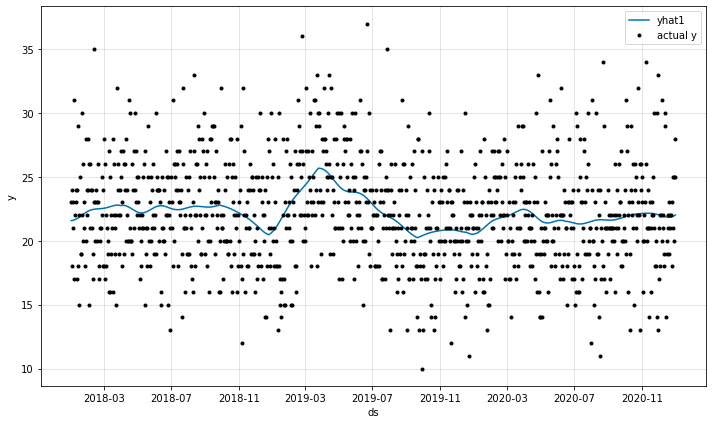

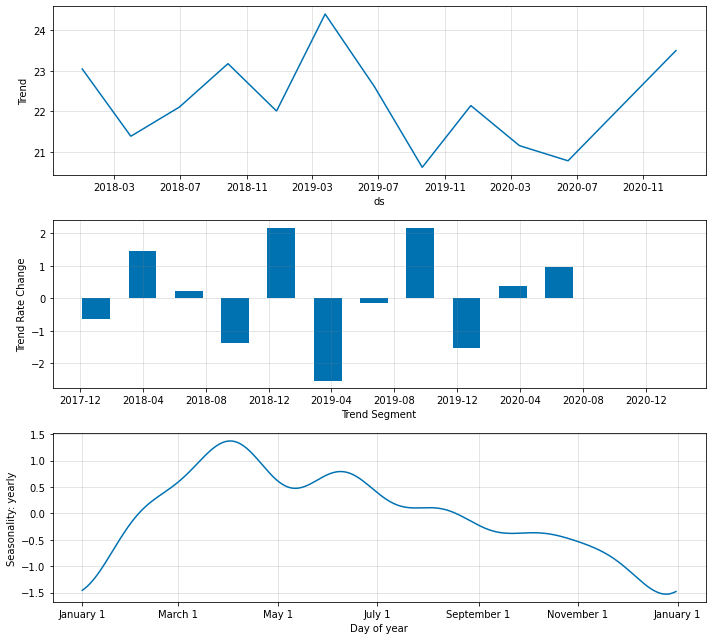

In [208]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred[-30*24*6:])
#fig2 = m.plot(train_pred[-7*24*6:])
#comp = m.plot_components(train_pred)
param = m.plot_parameters()

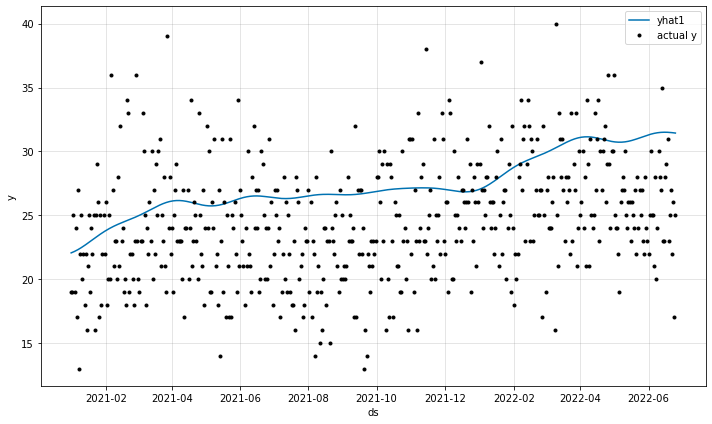

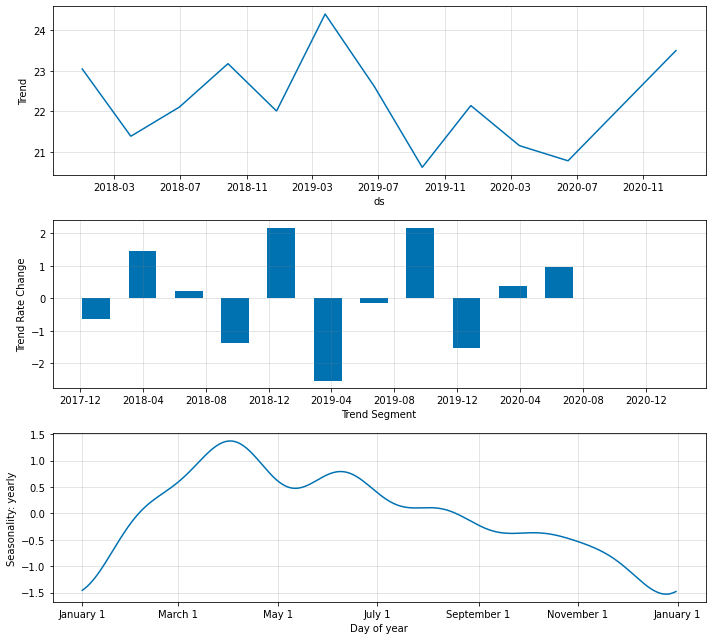

In [193]:
#테스트 데이터셋 예측 결과 시각화
test_pred = m.predict(test)
fig = m.plot(test_pred)
#fig1 = m.plot(test_pred[-14*24*6:])
#fig2 = m.plot(test_pred[-7*24*6:])
#comp = m.plot_components(test_pred)
param = m.plot_parameters()

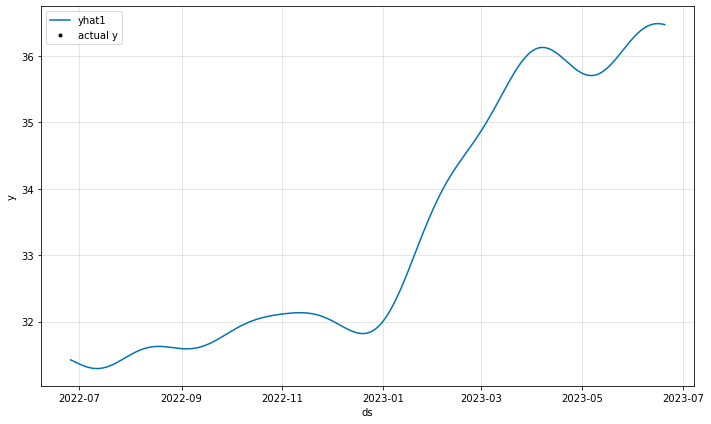

In [198]:
df_future = m.make_future_dataframe(test, periods=360)
forecast = m.predict(df_future)
fig_forecast = m.plot(forecast)

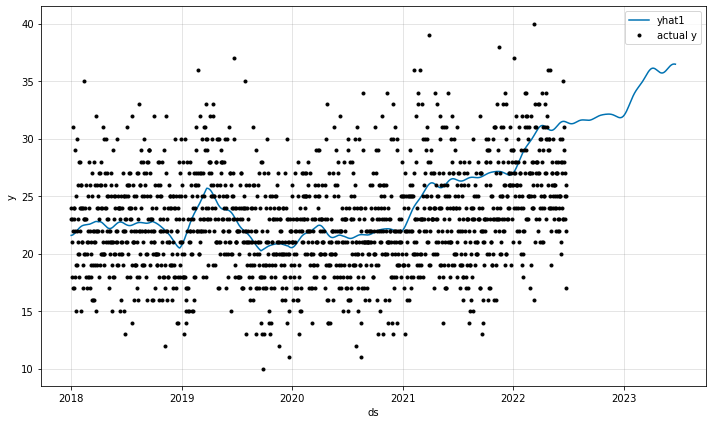

In [199]:
all_pred = pd.concat([train_pred, test_pred, forecast])
fig_all_pred = m.plot(all_pred)

# 성능평가

In [206]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

col = "Appliances"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2, squared=False)))
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 3.159737277204973
MSE : 16.1138168649432
RMSE : 4.014201896385282
MAPE : 0.14294944506942228


In [207]:
#테스트 데이터셋 검증
pred2 = test_pred["y"]
test2 = test_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**0.5)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 4.36962794023609
MSE : 28.12372521805354
RMSE : 5.303180669942666
MAPE : 0.15963802163678914


# 노원구

In [272]:
data = df.rename(columns = {'예정시간' : 'date'})
data1 = data[data['startpos1'] == '노원구'].groupby('date').count()

In [273]:
data1 = data1.reset_index()[['date', 'startpos1']]

In [284]:
data1.describe()

,startpos1
count,1637.000000
mean,26.931582
std,5.351024
min,13.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,52.000000


In [274]:
#train test split
cutoff = "2020-06-01"
train_df = data1[data1['date']<cutoff]
test_df = data1[data1['date']>=cutoff]
#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["date"], "y": train_df["startpos1"]})
test = pd.DataFrame({"ds": test_df["date"], "y": test_df["startpos1"]})

In [275]:
#모델 설정
m = NeuralProphet(
    learning_rate=0.1,
    weekly_seasonality=False,
    daily_seasonality=False
)

In [276]:
#모델 학습
metrics = m.fit(train, freq = 'D')

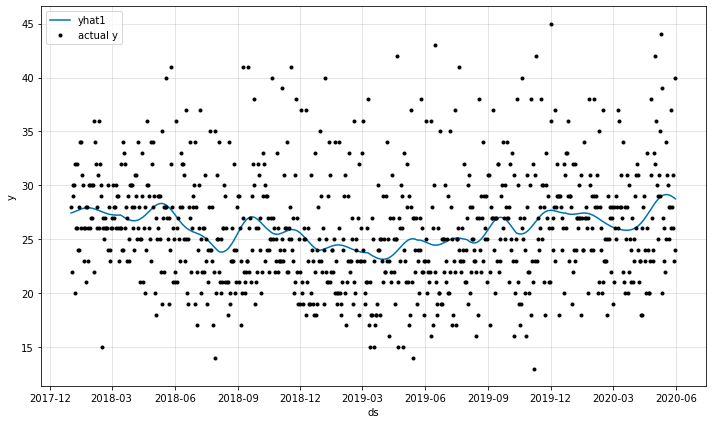

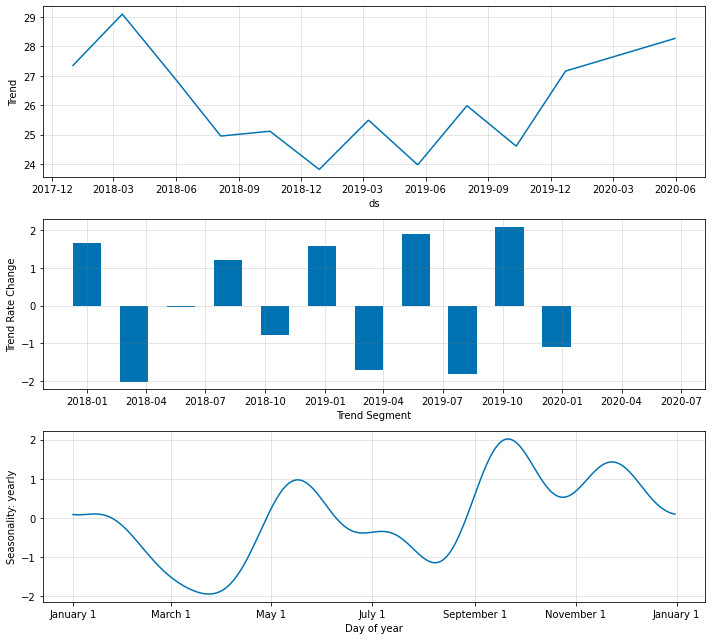

In [277]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred[-30*24*6:])
#fig2 = m.plot(train_pred[-7*24*6:])
#comp = m.plot_components(train_pred)
param = m.plot_parameters()

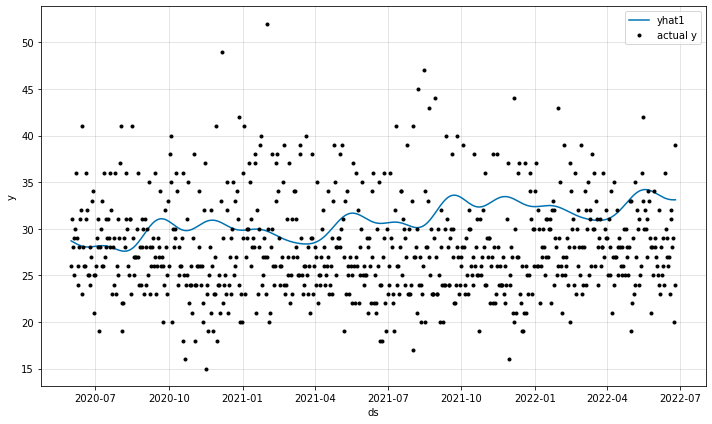

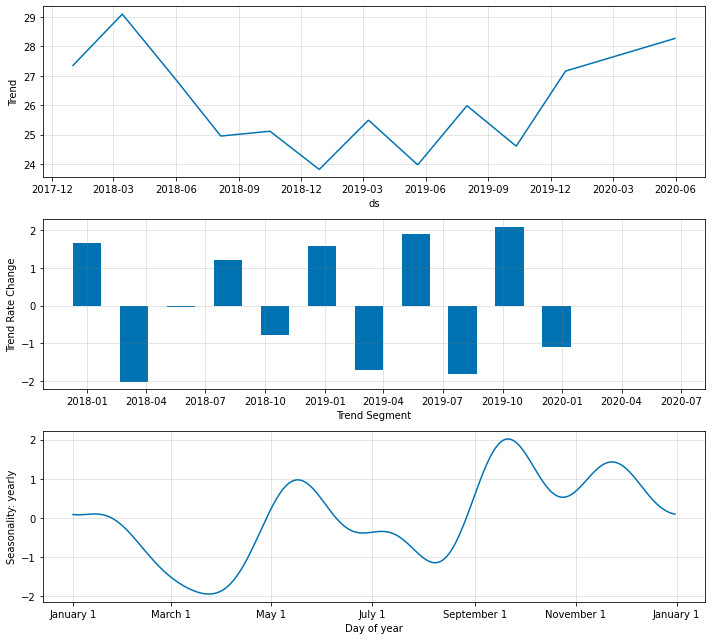

In [278]:
#테스트 데이터셋 예측 결과 시각화
test_pred = m.predict(test)
fig = m.plot(test_pred)
#fig1 = m.plot(test_pred[-14*24*6:])
#fig2 = m.plot(test_pred[-7*24*6:])
#comp = m.plot_components(test_pred)
param = m.plot_parameters()

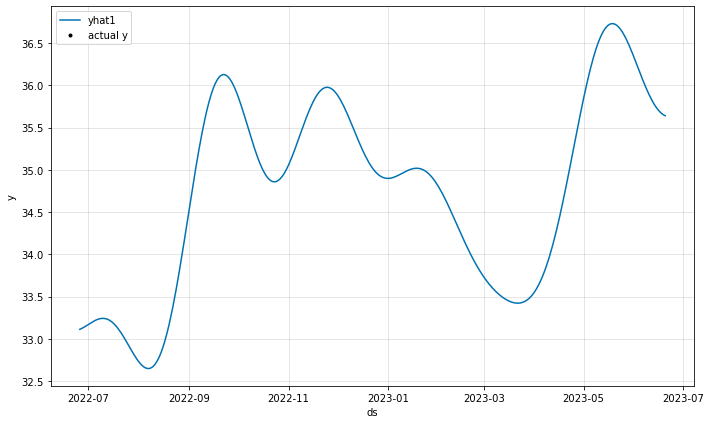

In [279]:
df_future = m.make_future_dataframe(test, periods=360)
forecast = m.predict(df_future)
fig_forecast = m.plot(forecast)

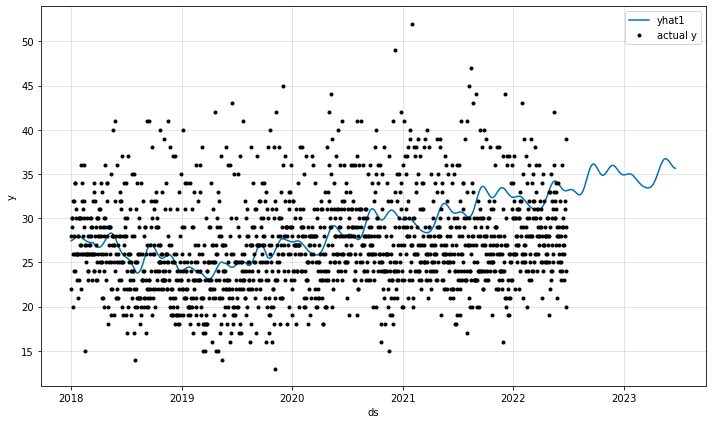

In [280]:
all_pred = pd.concat([train_pred, test_pred, forecast])
fig_all_pred = m.plot(all_pred)

In [281]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

col = "Appliances"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2, squared=False)))
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 3.90050255522436
MSE : 25.765897813842262
RMSE : 5.076011998985253
MAPE : 0.15076810600649954


In [282]:
#테스트 데이터셋 검증
pred2 = test_pred["y"]
test2 = test_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**0.5)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 5.233995303728722
MSE : 39.21635737355306
RMSE : 6.262296493583888
MAPE : 0.16843341742281695


In [285]:
data1.describe()

,startpos1
count,1637.000000
mean,26.931582
std,5.351024
min,13.000000
25%,23.000000
50%,26.000000
75%,30.000000
max,52.000000


# 서대문구

In [333]:
data = df.rename(columns = {'예정시간' : 'date'})
data2 = data[data['startpos1'] == '서대문구'].groupby('date').count()

In [334]:
data2 = data2.reset_index()[['date', 'startpos1']]

In [350]:
#train test split
cutoff = "2021-03-01"
train_df = data2[data2['date']<cutoff]
test_df = data2[data2['date']>=cutoff]
#전용 train, test 데이터 생성
train = pd.DataFrame({"ds": train_df["date"], "y": train_df["startpos1"]})
test = pd.DataFrame({"ds": test_df["date"], "y": test_df["startpos1"]})

In [351]:
#모델 설정
m = NeuralProphet(
    learning_rate=0.1,
    weekly_seasonality=False,
    daily_seasonality=False
)

In [352]:
#모델 학습
metrics = m.fit(train, freq = 'D')

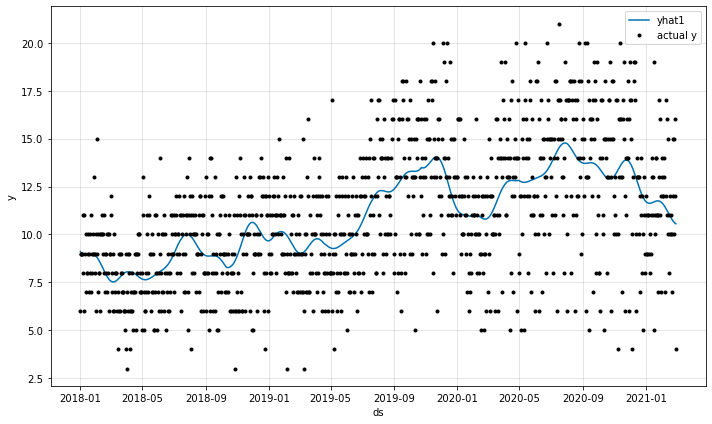

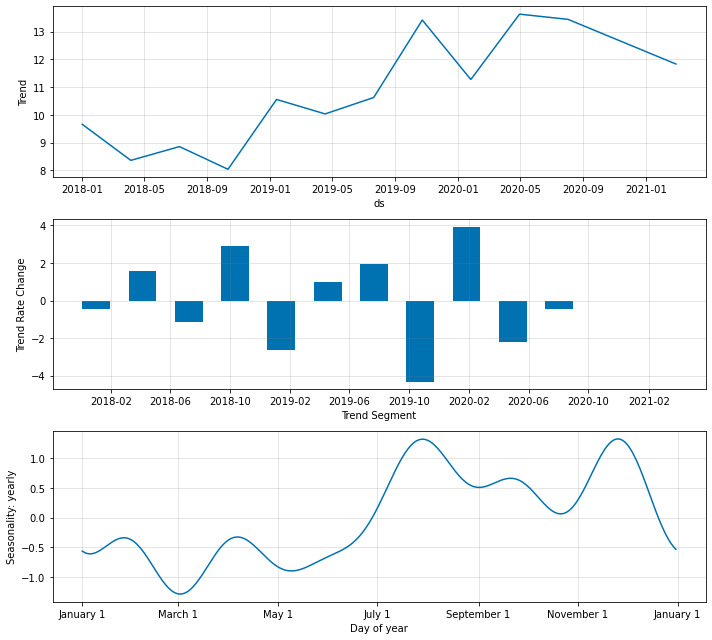

In [353]:
#학습 데이터셋 예측 결과 시각화
train_pred = m.predict(train)
#fig = m.plot(train_pred)
fig1 = m.plot(train_pred[-30*24*6:])
#fig2 = m.plot(train_pred[-7*24*6:])
#comp = m.plot_components(train_pred)
param = m.plot_parameters()

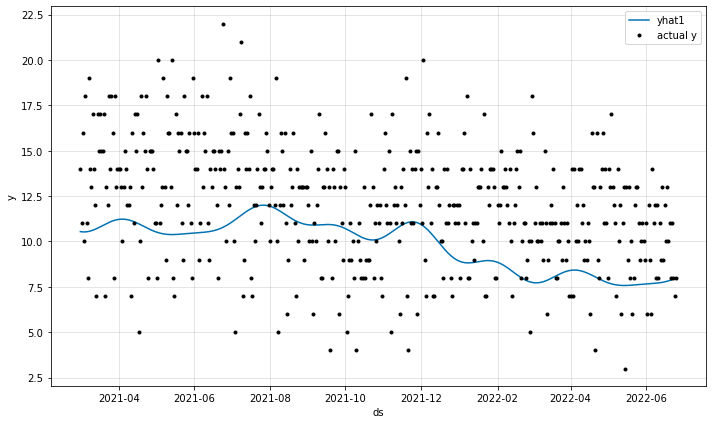

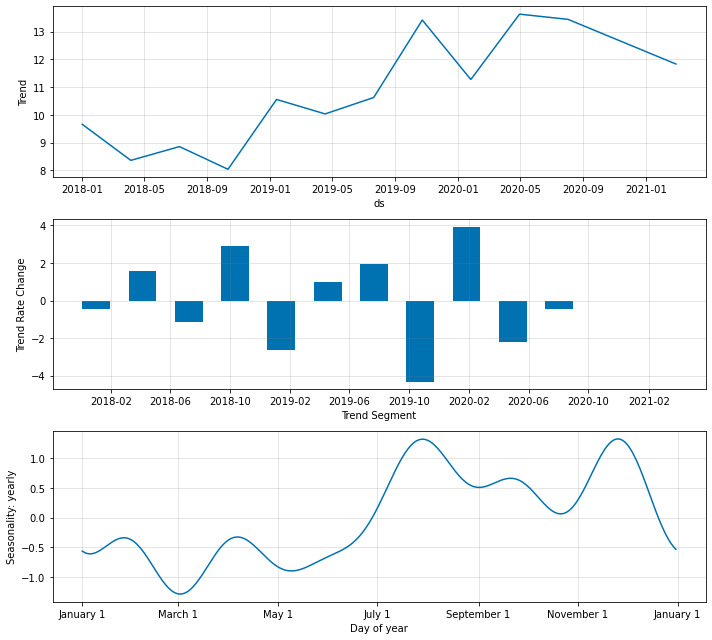

In [354]:
#테스트 데이터셋 예측 결과 시각화
test_pred = m.predict(test)
fig = m.plot(test_pred)
#fig1 = m.plot(test_pred[-14*24*6:])
#fig2 = m.plot(test_pred[-7*24*6:])
#comp = m.plot_components(test_pred)
param = m.plot_parameters()

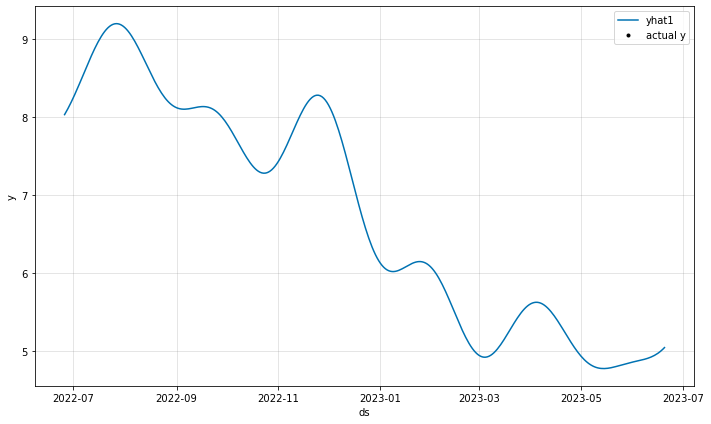

In [355]:
df_future = m.make_future_dataframe(test, periods=360)
forecast = m.predict(df_future)
fig_forecast = m.plot(forecast)

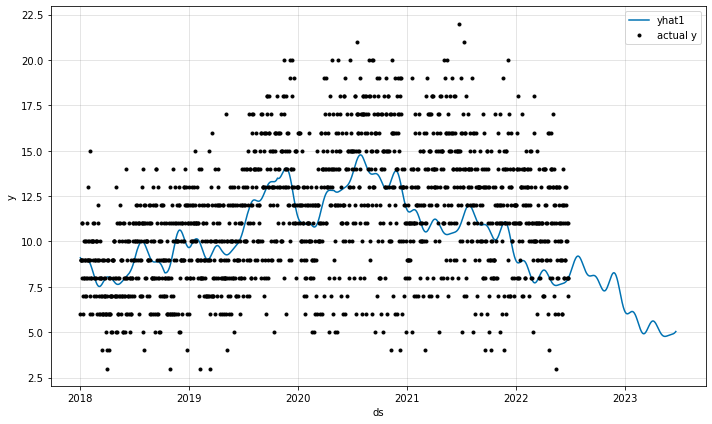

In [356]:
all_pred = pd.concat([train_pred, test_pred, forecast])
fig_all_pred = m.plot(all_pred)

In [310]:

col = "Appliances"

#학습 데이터셋 검증
pred2 = train_pred["y"]
test2 = train_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2, squared=False)))
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 2.2892356322784173
MSE : 8.293205256425642
RMSE : 2.8797925717706896
MAPE : 0.23432368611895377


In [311]:
#테스트 데이터셋 검증
pred2 = test_pred["y"]
test2 = test_pred['yhat1']
print("============== {} Evaluate Result============".format(col))
print("MAE :", mean_absolute_error(test2, pred2))
print("MSE :", mean_squared_error(test2, pred2))
print("RMSE :", (mean_squared_error(test2, pred2))**0.5)
print("MAPE :", mean_absolute_percentage_error(test2, pred2))

============== Appliances Evaluate Result============
MAE : 2.730605757434691
MSE : 11.972641159273033
RMSE : 3.4601504532712206
MAPE : 0.32891815870036417


In [312]:
data2.describe()

,startpos1
count,1637.000000
mean,9.792914
std,3.076927
min,2.000000
25%,8.000000
50%,10.000000
75%,12.000000
max,22.000000
